# Dia 2, Libreta 5 acelerometro

En esta libreta accederemos a los datos de su acelerometro. Nuevamente importen el modulo y creen un objeto `android`.

In [30]:
import android
droide=android.Android()

In [8]:
droide.ttsSpeak("hola bato")

Result(id=0, result=None, error=None)

In [9]:
# 100ms entre lecturas
dt = 100
# duracion de la muestras
fin = 3000

Inicializamos el tiempo de censado e iniciamos censado en el dispositivo

In [10]:
tiempo = 0
droide.startSensingTimed(2,dt)

Result(id=1, result=None, error=None)

La siguiente instruccion regresa los valores de la lectura del acelerometro:

In [14]:
droide.sensorsReadAccelerometer()

Result(id=4, result=[12.641385, -2.030283, -0.842759], error=None)

Guardaremos estas lecturas en una variable que contendra los datos

In [13]:
lecturas = []

Ahora censamos hasta que el tiempo alcance el tiempo de sensado

In [28]:
import time
while tiempo <= fin:
    lecturas.append(droide.sensorsReadAccelerometer().result)
    time.sleep(dt/1000.0)
    tiempo += dt
    
droide.stopSensing();

error: [Errno 10053] Se ha anulado una conexión establecida por el software en su equipo host

In [23]:
lecturas

[[0.11492168, 0.34476504, 9.959879],
 [0.076614454, 0.34476504, 9.959879],
 [0.076614454, 0.38307226, 9.998186],
 [0.076614454, 0.38307226, 9.959879],
 [0.11492168, 0.34476504, 9.959879],
 [0.076614454, 0.34476504, 9.998186],
 [0.076614454, 0.34476504, 9.959879],
 [0.11492168, 0.34476504, 9.959879],
 [0.076614454, 0.34476504, 9.959879],
 [0.076614454, 0.38307226, 9.959879],
 [0.11492168, 0.34476504, 9.959879],
 [0.11492168, 0.34476504, 9.959879],
 [0.11492168, 0.34476504, 9.959879],
 [0.076614454, 0.34476504, 9.959879],
 [0.11492168, 0.38307226, 9.959879],
 [0.11492168, 0.34476504, 9.921572],
 [0.076614454, 0.34476504, 9.921572],
 [0.076614454, 0.38307226, 9.959879],
 [0.11492168, 0.34476504, 9.959879],
 [0.076614454, 0.34476504, 9.959879],
 [0.11492168, 0.34476504, 9.998186],
 [0.076614454, 0.34476504, 9.959879],
 [0.076614454, 0.34476504, 9.959879],
 [0.076614454, 0.34476504, 9.959879],
 [0.11492168, 0.34476504, 9.959879],
 [0.11492168, 0.34476504, 9.959879],
 [0.076614454, 0.3447650

In [24]:
import pandas as pd
%matplotlib inline

In [25]:
df = pd.DataFrame(lecturas, columns=['x','y','z'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 3 columns):
x    31 non-null float64
y    31 non-null float64
z    31 non-null float64
dtypes: float64(3)
memory usage: 992.0 bytes


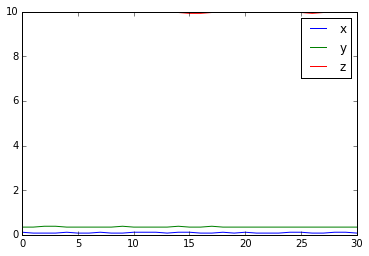

In [27]:
df.plot()

# Ejercicio

Escriban un script que lleve a cabo unicamente la lectura de los datos del acelerometro de su dispositivo y copienlo en el folder correspondiente para ejecutarlo desde sus dispositivos.

In [25]:
%%file acelerometroClase.py
import android
import time
import csv

dt = 100
fin = 5000
tiempo = 0

droide = android.Android()
droide.startSensingTimed(2,dt)
lecturas = []
while tiempo <= fin:
    lecturas.append(droide.sensorsReadAccelerometer().result)
    time.sleep(dt/1000.0)
    tiempo += dt
droide.stopSensing();

with open ('test.csv','w') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerows(lecturas)

Writing acelerometroClase.py


In [26]:
!adb push acelerometroClase.py /sdcard/sl4a/scripts

112 KB/s (408 bytes in 0.003s)


In [28]:
!adb pull test.csv /sdcard/sl4a/scripts
%Load test.csv

remote object 'test.csv' does not exist
ERROR: Line magic function `%Load` not found.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 3 columns):
x    50 non-null float64
y    50 non-null float64
z    50 non-null float64
dtypes: float64(3)
memory usage: 1.6 KB


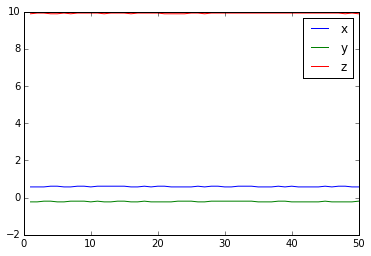

In [23]:
import pandas as pd

%matplotlib inline

df = pd.DataFrame(lecturas, columns=['x','y','z'])
df.info()
df.plot()